In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
from keras.optimizers import Adamax

In [3]:
#loading the data
data = pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#check for NaN
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11045d828>,
      dtype=object)

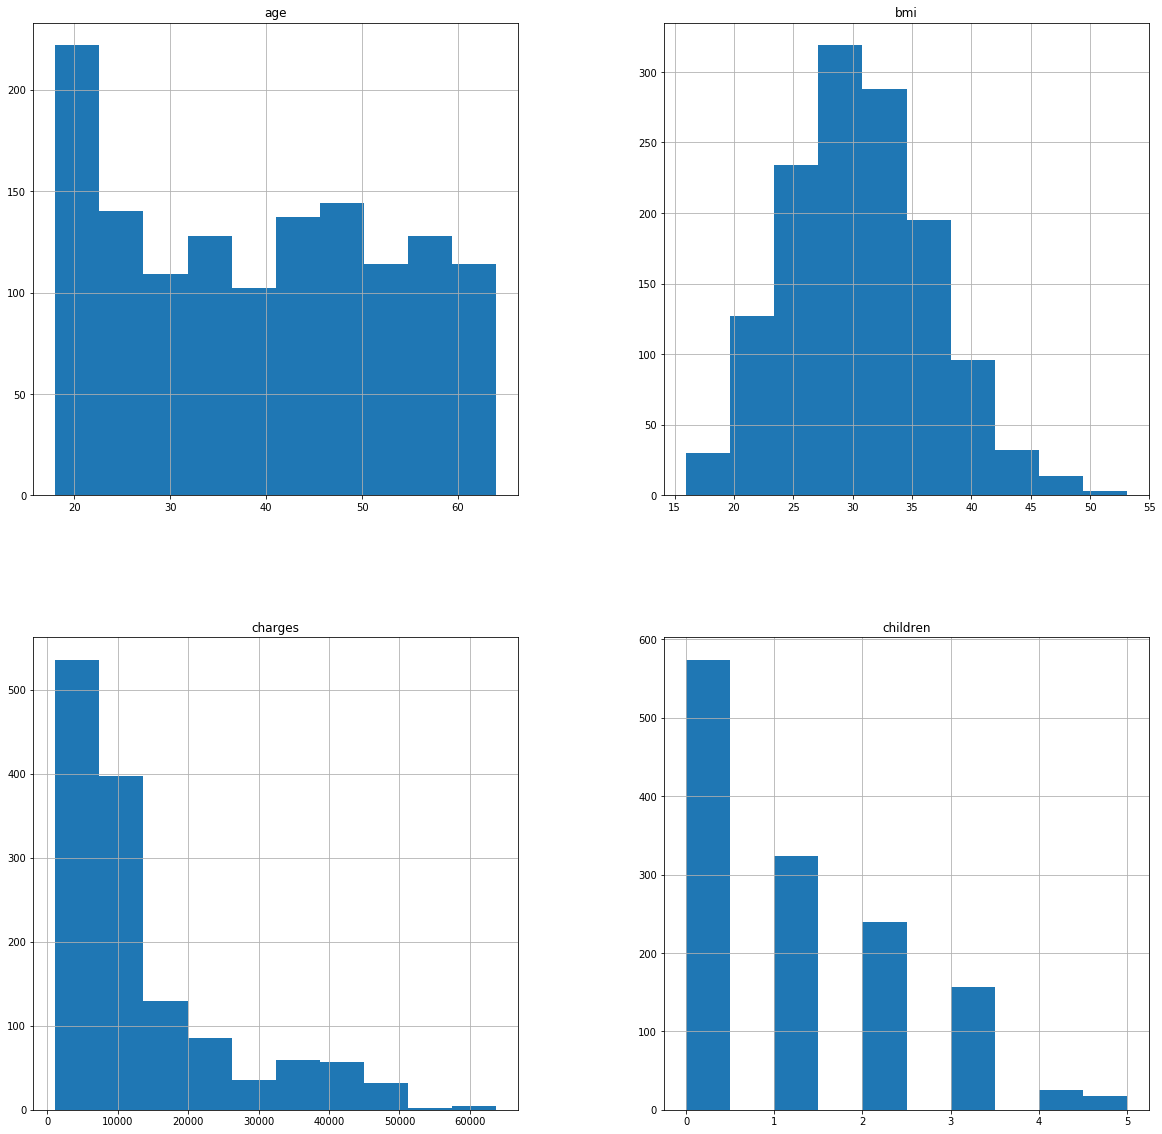

In [6]:
#data histogram
data.hist(figsize=(20,20))

In [7]:
#one hot encoding for categorical variables
data = pd.get_dummies(data=data)

In [8]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
feat_tools_x = data[['charges','age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest']]
x = data[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest']]
y = data[['charges']]

In [10]:
# create scaler for x's and y
x_scaler = MinMaxScaler()
x_scaler.fit(x)
x = x_scaler.transform(x)

In [11]:
y_scaler = MinMaxScaler()
y_scaler.fit(y)
y = y_scaler.transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22)

In [13]:
adamax = Adamax(lr=0.03)

In [14]:
model = Sequential()
model.add(Dense(40,activation="tanh",input_shape=(X_train.shape[1],)))
model.add(Dense(20,activation="tanh"))
model.add(Dense(5,activation="tanh"))
model.add(Dense(1, activation="linear"))
model.compile(loss='mae', optimizer=adamax, metrics=['mse'])

In [15]:
history = model.fit(X_train, y_train, epochs=60, batch_size=16, verbose=0, shuffle=False)

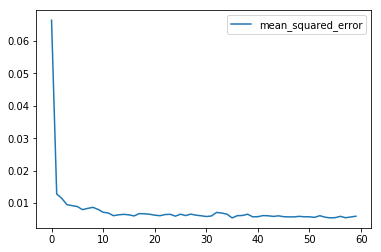

In [16]:
plt.plot(history.history['mean_squared_error'])
plt.legend(['mean_squared_error'])
plt.show()

In [17]:
predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

0.0068444764207451665

In [18]:
pred_ = y_scaler.inverse_transform(predictions)
real_ = y_scaler.inverse_transform(y_test)

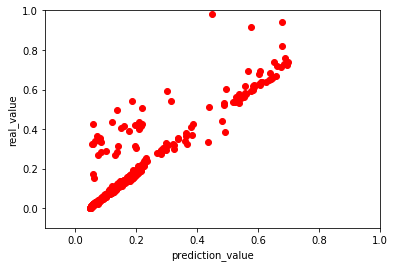

In [19]:
plt.plot(predictions ,y_test,'ro')
plt.xlabel("prediction_value")
plt.ylabel("real_value")
plt.ylim(ymin=-0.1, ymax=1)
plt.xlim(xmin=-0.1, xmax=1)
plt.show()

In [20]:
### Testing with Tree
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
est = GradientBoostingRegressor(n_estimators=300, learning_rate=0.01,
                                max_depth=7,
                                random_state=0,
                                loss='ls')
est.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [22]:
predictions_ = est.predict(X_test)
mean_squared_error(y_test, predictions_)

0.00677794152010859

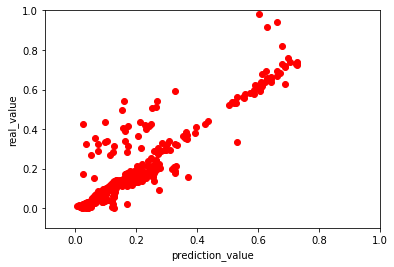

In [23]:
plt.plot(predictions_ ,y_test,'ro')
plt.xlabel("prediction_value")
plt.ylabel("real_value")
plt.ylim(ymin=-0.1, ymax=1)
plt.xlim(xmin=-0.1, xmax=1)
plt.show()